In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.csv to creditcard.csv.csv


In [ ]:

import pandas as pd

df = pd.read_csv("creditcard.csv.csv")
print("Data Loaded Successfully!")
print(df.shape)
print(df.head())

Data Loaded Successfully!
(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.2060

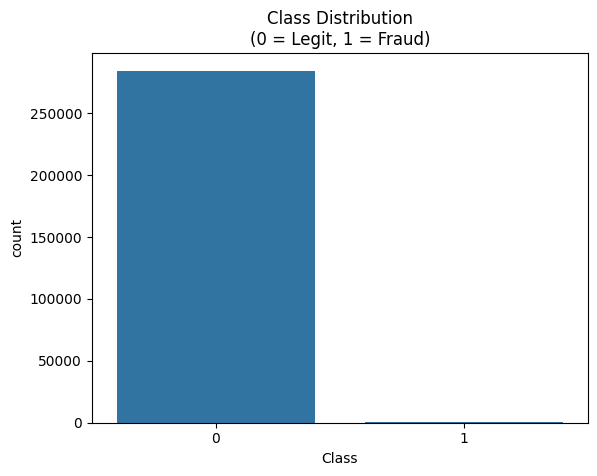

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Class Distribution\n(0 = Legit, 1 = Fraud)")
plt.show()

print(df['Class'].value_counts())


In [ ]:

import pandas as pd

df = pd.read_csv("creditcard.csv.csv")
print("Data Loaded Successfully!")
print(df.shape)
print(df.head())


if 'Amount' not in df.columns:
    print("Error: 'Amount' column not found in the DataFrame.")
else:
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
    df['scaled_time'] = scaler.fit_transform(df[['Time']])
    df.drop(['Amount', 'Time'], axis=1, inplace=True)

    scaled_features = ['scaled_amount', 'scaled_time']
    remaining_features = [col for col in df.columns if col not in ['scaled_amount', 'scaled_time']]
    df = df[scaled_features + remaining_features]

    X = df.drop('Class', axis=1)
    y = df['Class']

Data Loaded Successfully!
(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.2060

In [ ]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("After SMOTE:", y_res.value_counts())


After SMOTE: Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [ ]:
# Train Models and Predict

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
#  Evaluation Function
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n------ {name} ------")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

# Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)



------ Logistic Regression ------
Confusion Matrix:
[[83058  2091]
 [ 6687 78753]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

ROC AUC Score: 0.9486

------ Decision Tree ------
Confusion Matrix:
[[84895   254]
 [   85 85355]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

ROC AUC Score: 0.9980

------ Random Forest ------
Confusion Matrix:
[[85132    17]
 [    0 85440]]

Classificatio

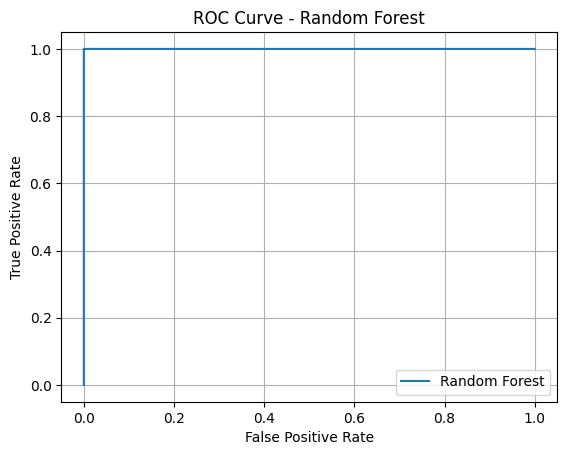

In [ ]:
#  Plot ROC Curve for Random Forest
from sklearn.metrics import roc_curve

y_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()
